In [594]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_squared_error

In [595]:
lebron = pd.read_csv('lebron.csv')

In [596]:
lebron

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,2003-04,19,CLE,NBA,SG,79,79,39.5,7.9,18.9,...,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,MVP-9ROY-1
1,2004-05,20,CLE,NBA,SF,80,80,42.4,9.9,21.1,...,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,MVP-6NBA2ASMIP-6
2,2005-06,21,CLE,NBA,SF,79,79,42.5,11.1,23.1,...,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4,MVP-2NBA1ASMIP-19
3,2006-07,22,CLE,NBA,SF,78,78,40.9,9.9,20.8,...,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3,MVP-5NBA2AS
4,2007-08,23,CLE,NBA,SF,75,74,40.4,10.6,21.9,...,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0,MVP-4NBA1ASMIP-18
5,2008-09,24,CLE,NBA,SF,81,81,37.7,9.7,19.9,...,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4,MVP-1NBA1DEF1ASDPOY-2
6,2009-10,25,CLE,NBA,SF,76,76,39.0,10.1,20.1,...,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7,MVP-1NBA1DEF1ASDPOY-4
7,2010-11,26,MIA,NBA,SF,79,79,38.8,9.6,18.8,...,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7,MVP-3NBA1DEF1ASDPOY-9
8,2011-12,27,MIA,NBA,SF,62,62,37.5,10.0,18.9,...,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1,MVP-1NBA1DEF1ASDPOY-4
9,2012-13,28,MIA,NBA,PF,76,76,37.9,10.1,17.8,...,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8,MVP-1NBA1DEF1ASDPOY-2


In [597]:
x = lebron['Season']
y = lebron['PTS']

In [598]:
def plot_over_time(feature):
    y = lebron[feature]
    plt.figure()
    plt.plot(range(21), y, 'b-')
    plt.xlim(1, 21)
    # plt.ylim(18, 35)
    plt.grid(axis='y')
    plt.xlabel('season')
    plt.ylabel(feature)

    # Find max and min points
    max_point = max(y)
    min_point = min(y)
    max_index = y.idxmax() + 1  # Use idxmax() to get the index of the maximum value
    min_index = y.idxmin() + 1  # Use idxmin() to get the index of the minimum value

    # Annotate max and min points
#     plt.annotate(f'Max: {max_point} in season {max_index}', xy=(max_index, max_point), xytext=(max_index, max_point + 2),
#                  arrowprops=dict(facecolor='green', arrowstyle='->'), color='green')
#     plt.annotate(f'Min: {min_point} in season {min_index}', xy=(min_index, min_point), xytext=(min_index, min_point - 2),
#                  arrowprops=dict(facecolor='red', arrowstyle='->'), color='red')

    plt.xticks(range(0, 22, 2))

In [599]:
del lebron['Awards']

In [600]:
lebron

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,19,CLE,NBA,SG,79,79,39.5,7.9,18.9,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,2004-05,20,CLE,NBA,SF,80,80,42.4,9.9,21.1,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,2005-06,21,CLE,NBA,SF,79,79,42.5,11.1,23.1,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,2006-07,22,CLE,NBA,SF,78,78,40.9,9.9,20.8,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,2007-08,23,CLE,NBA,SF,75,74,40.4,10.6,21.9,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0
5,2008-09,24,CLE,NBA,SF,81,81,37.7,9.7,19.9,...,0.780,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4
6,2009-10,25,CLE,NBA,SF,76,76,39.0,10.1,20.1,...,0.767,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7
7,2010-11,26,MIA,NBA,SF,79,79,38.8,9.6,18.8,...,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7
8,2011-12,27,MIA,NBA,SF,62,62,37.5,10.0,18.9,...,0.771,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1
9,2012-13,28,MIA,NBA,PF,76,76,37.9,10.1,17.8,...,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8


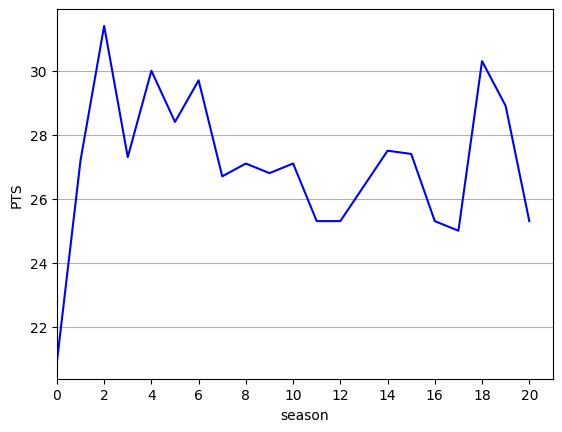

In [601]:
plot_over_time('PTS')

In [602]:
# for i in ['PTS', '']
lebron.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [603]:
features = ['FG%','3P%', '2P%','FT%', 'AST', 'PTS', 'eFG%', 'ORB', 'DRB', 'STL', 'BLK']

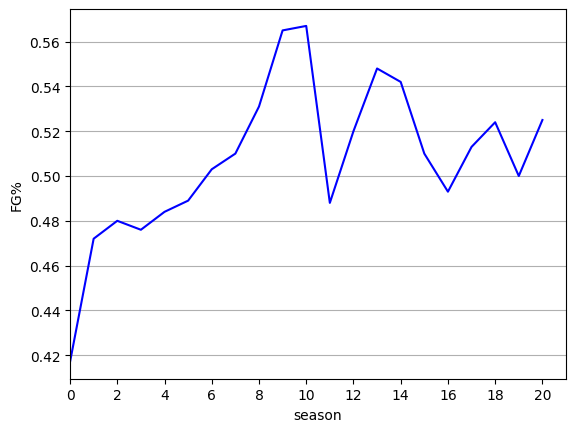

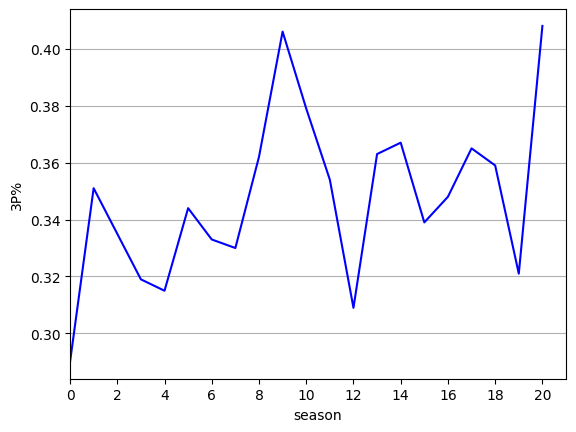

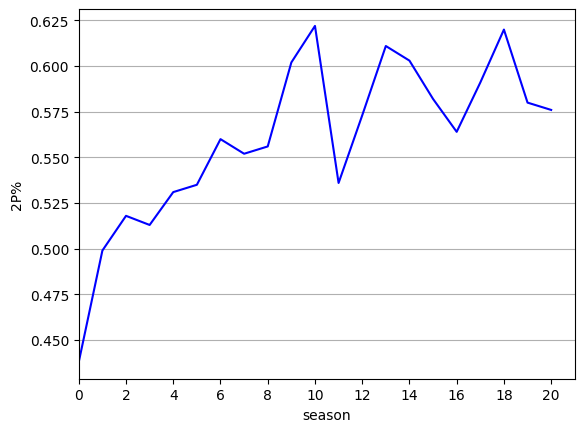

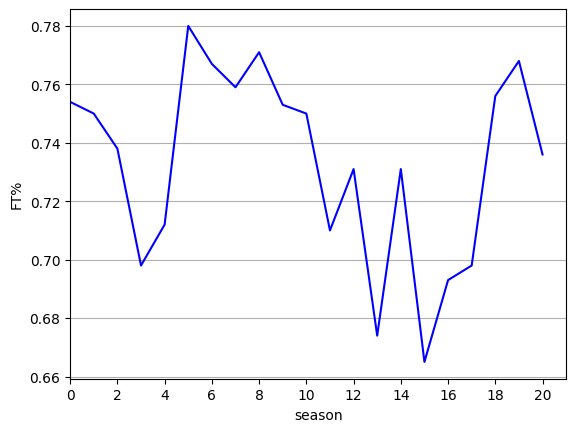

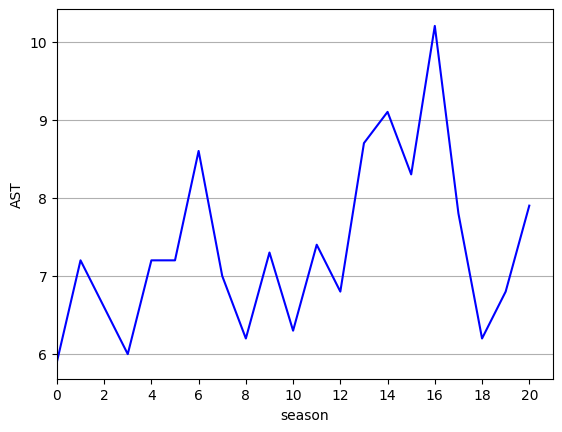

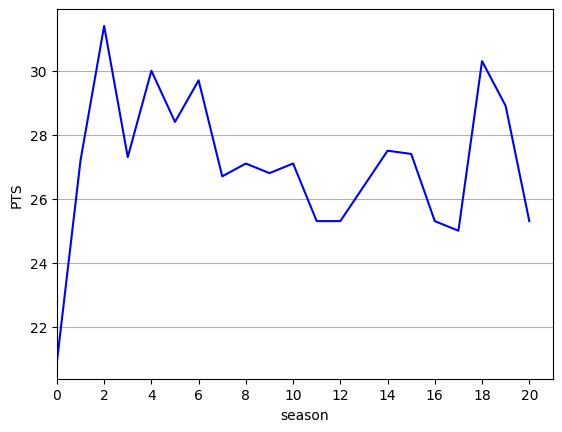

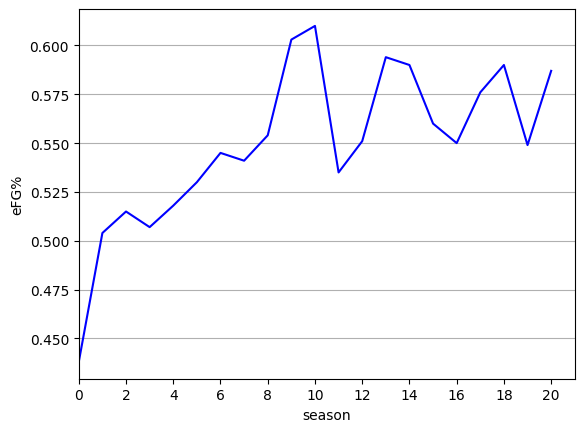

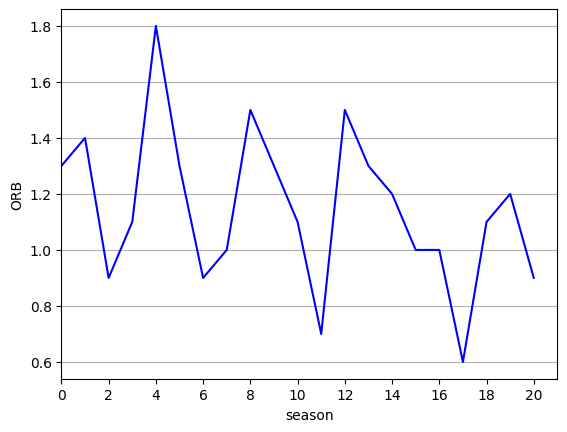

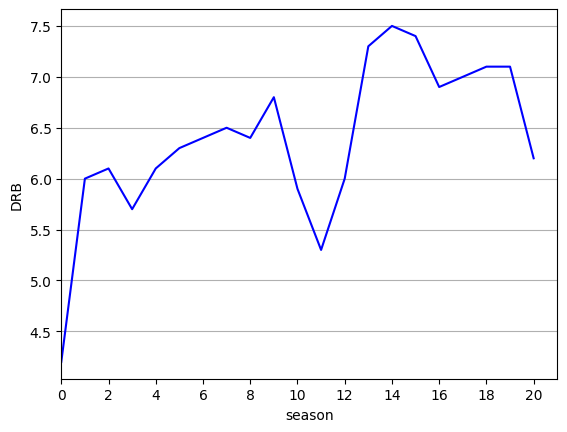

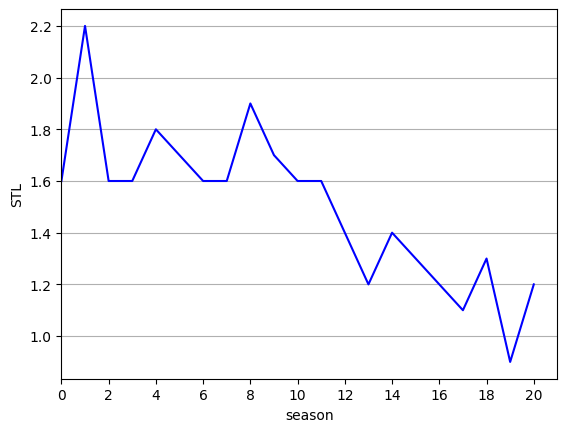

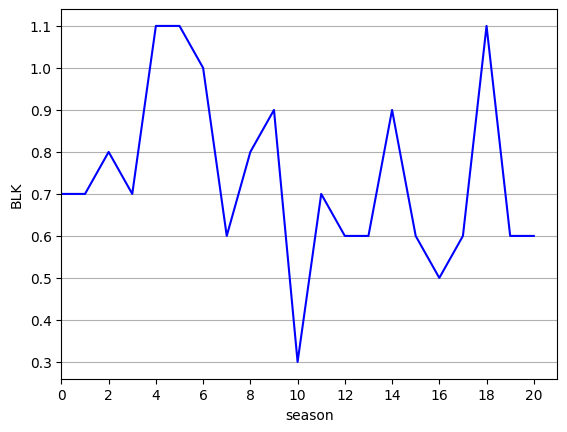

In [604]:
for i in features:
    plot_over_time(i)

In [605]:
relevant_features = lebron[features]

In [606]:
relevant_features

,FG%,3P%,2P%,FT%,AST,PTS,eFG%,ORB,DRB,STL,BLK
0,0.417,0.290,0.438,0.754,5.9,20.9,0.438,1.3,4.2,1.6,0.7
1,0.472,0.351,0.499,0.750,7.2,27.2,0.504,1.4,6.0,2.2,0.7
2,0.480,0.335,0.518,0.738,6.6,31.4,0.515,0.9,6.1,1.6,0.8
3,0.476,0.319,0.513,0.698,6.0,27.3,0.507,1.1,5.7,1.6,0.7
4,0.484,0.315,0.531,0.712,7.2,30.0,0.518,1.8,6.1,1.8,1.1
5,0.489,0.344,0.535,0.780,7.2,28.4,0.530,1.3,6.3,1.7,1.1
6,0.503,0.333,0.560,0.767,8.6,29.7,0.545,0.9,6.4,1.6,1.0
7,0.510,0.330,0.552,0.759,7.0,26.7,0.541,1.0,6.5,1.6,0.6
8,0.531,0.362,0.556,0.771,6.2,27.1,0.554,1.5,6.4,1.9,0.8
9,0.565,0.406,0.602,0.753,7.3,26.8,0.603,1.3,6.8,1.7,0.9


In [607]:
from sklearn.preprocessing import MinMaxScaler

In [608]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(relevant_features)

In [609]:
X_normalized

array([[0.        , 0.        , 0.        , 0.77391304, 0.        ,
        0.        , 0.        , 0.58333333, 0.        , 0.53846154,
        0.5       ],
       [0.36666667, 0.51694915, 0.33152174, 0.73913043, 0.30232558,
        0.6       , 0.38372093, 0.66666667, 0.54545455, 1.        ,
        0.5       ],
       [0.42      , 0.38135593, 0.43478261, 0.63478261, 0.1627907 ,
        1.        , 0.44767442, 0.25      , 0.57575758, 0.53846154,
        0.625     ],
       [0.39333333, 0.24576271, 0.4076087 , 0.28695652, 0.02325581,
        0.60952381, 0.40116279, 0.41666667, 0.45454545, 0.53846154,
        0.5       ],
       [0.44666667, 0.21186441, 0.50543478, 0.40869565, 0.30232558,
        0.86666667, 0.46511628, 1.        , 0.57575758, 0.69230769,
        1.        ],
       [0.48      , 0.45762712, 0.52717391, 1.        , 0.30232558,
        0.71428571, 0.53488372, 0.58333333, 0.63636364, 0.61538462,
        1.        ],
       [0.57333333, 0.36440678, 0.66304348, 0.88695652, 0.

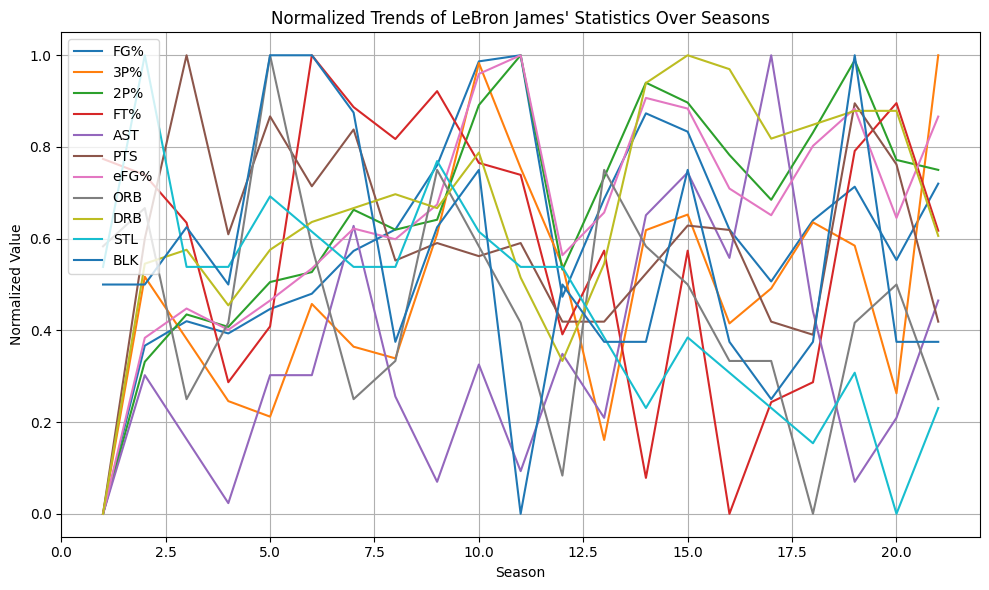

In [610]:
plt.figure(figsize=(10, 6))
for i in range(X_normalized.shape[1]):  # Iterate over each feature
    plt.plot(range(1, 22), X_normalized[:, i], label=relevant_features.columns[i])

plt.xlabel("Season")
plt.ylabel("Normalized Value")
plt.title("Normalized Trends of LeBron James' Statistics Over Seasons")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

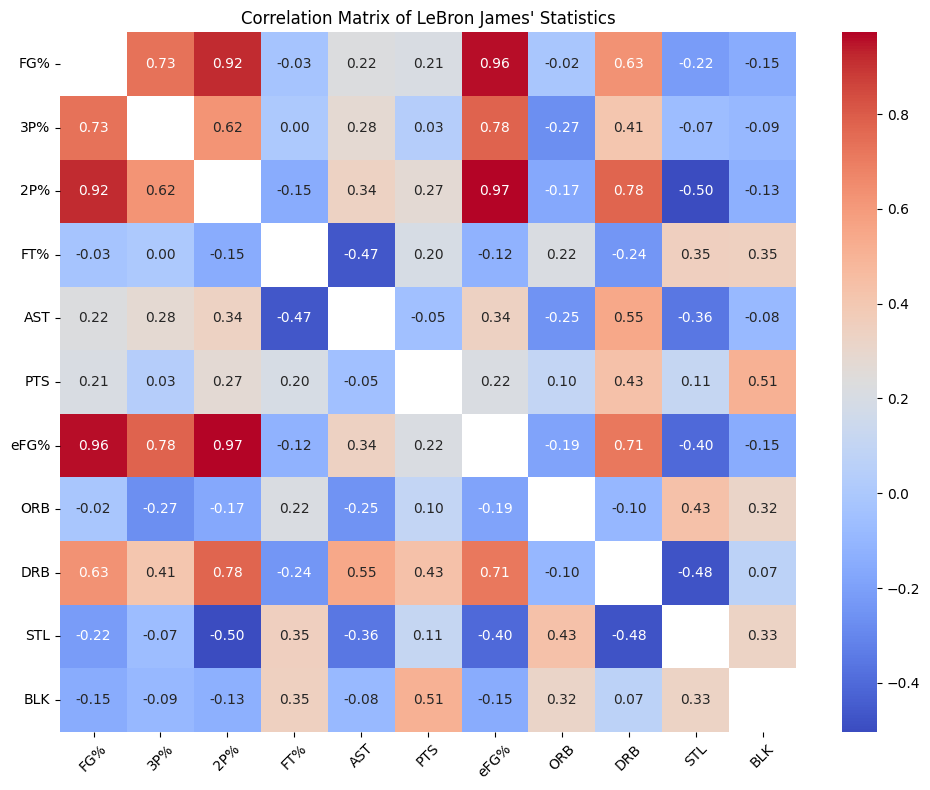

In [611]:
import seaborn as sns

correlation_matrix = relevant_features.corr()

np.fill_diagonal(correlation_matrix.values, np.nan)


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix of LeBron James' Statistics")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [612]:
correlation_matrix

,FG%,3P%,2P%,FT%,AST,PTS,eFG%,ORB,DRB,STL,BLK
FG%,NaN,0.733084,0.915144,-0.026189,0.223927,0.209490,0.956583,-0.016841,0.630175,-0.219269,-0.148143
3P%,0.733084,NaN,0.623887,0.002635,0.277772,0.033006,0.777642,-0.268710,0.408275,-0.070793,-0.089378
2P%,0.915144,0.623887,NaN,-0.146998,0.337318,0.274590,0.972622,-0.165467,0.775602,-0.503398,-0.131984
FT%,-0.026189,0.002635,-0.146998,NaN,-0.465869,0.197532,-0.117802,0.216456,-0.242071,0.354642,0.346806
AST,0.223927,0.277772,0.337318,-0.465869,NaN,-0.049475,0.342766,-0.251440,0.551667,-0.355231,-0.084573
PTS,0.209490,0.033006,0.274590,0.197532,-0.049475,NaN,0.216245,0.101021,0.433746,0.109368,0.511263
eFG%,0.956583,0.777642,0.972622,-0.117802,0.342766,0.216245,NaN,-0.189883,0.713391,-0.401918,-0.146671
ORB,-0.016841,-0.268710,-0.165467,0.216456,-0.251440,0.101021,-0.189883,NaN,-0.095720,0.433600,0.317340
DRB,0.630175,0.408275,0.775602,-0.242071,0.551667,0.433746,0.713391,-0.095720,NaN,-0.475845,0.068562
STL,-0.219269,-0.070793,-0.503398,0.354642,-0.355231,0.109368,-0.401918,0.433600,-0.475845,NaN,0.330090


In [613]:
for i in correlation_matrix.columns:
    print(correlation_matrix[i].idxmax)

<bound method Series.idxmax of FG%          NaN
3P%     0.733084
2P%     0.915144
FT%    -0.026189
AST     0.223927
PTS     0.209490
eFG%    0.956583
ORB    -0.016841
DRB     0.630175
STL    -0.219269
BLK    -0.148143
Name: FG%, dtype: float64>
<bound method Series.idxmax of FG%     0.733084
3P%          NaN
2P%     0.623887
FT%     0.002635
AST     0.277772
PTS     0.033006
eFG%    0.777642
ORB    -0.268710
DRB     0.408275
STL    -0.070793
BLK    -0.089378
Name: 3P%, dtype: float64>
<bound method Series.idxmax of FG%     0.915144
3P%     0.623887
2P%          NaN
FT%    -0.146998
AST     0.337318
PTS     0.274590
eFG%    0.972622
ORB    -0.165467
DRB     0.775602
STL    -0.503398
BLK    -0.131984
Name: 2P%, dtype: float64>
<bound method Series.idxmax of FG%    -0.026189
3P%     0.002635
2P%    -0.146998
FT%          NaN
AST    -0.465869
PTS     0.197532
eFG%   -0.117802
ORB     0.216456
DRB    -0.242071
STL     0.354642
BLK     0.346806
Name: FT%, dtype: float64>
<bound method Series

In [614]:
max_column = correlation_matrix.idxmax(axis=1)

In [615]:
max_column

FG%     eFG%
3P%     eFG%
2P%     eFG%
FT%      STL
AST      DRB
PTS      BLK
eFG%     2P%
ORB      STL
DRB      2P%
STL      ORB
BLK      PTS
dtype: object

In [616]:
np.fill_diagonal(correlation_matrix.values, np.nan)

In [617]:
max_column = correlation_matrix.idxmax(axis=1)

In [618]:
max_column

FG%     eFG%
3P%     eFG%
2P%     eFG%
FT%      STL
AST      DRB
PTS      BLK
eFG%     2P%
ORB      STL
DRB      2P%
STL      ORB
BLK      PTS
dtype: object

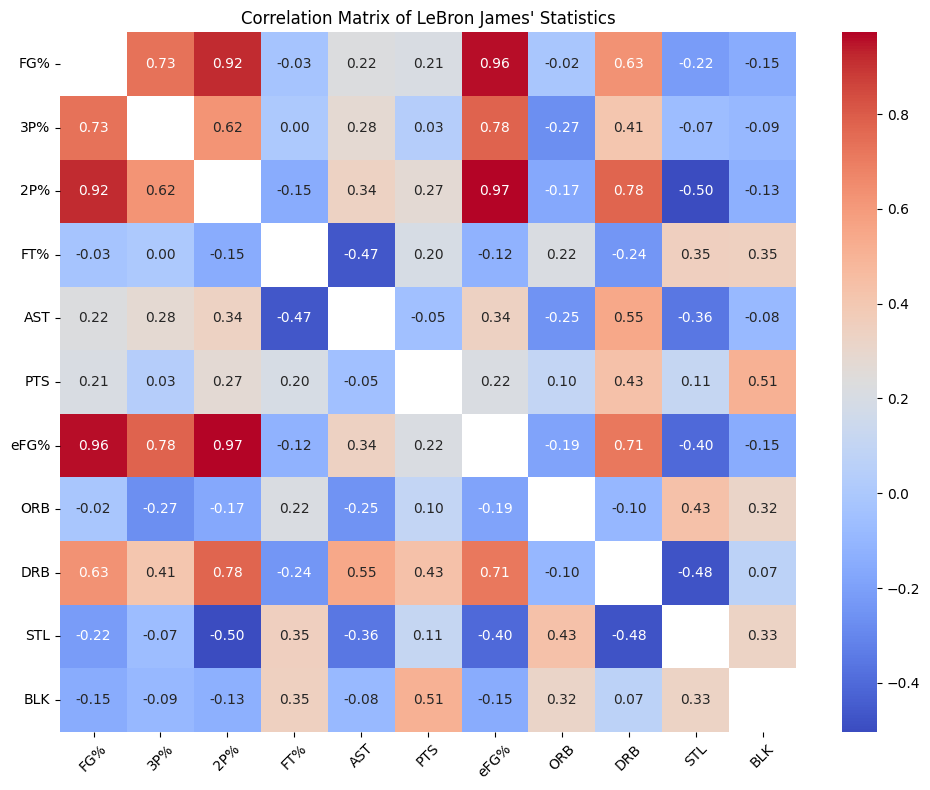

In [619]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix of LeBron James' Statistics")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [620]:
max_column = correlation_matrix.idxmin(axis=1)
max_column

FG%     STL
3P%     ORB
2P%     STL
FT%     AST
AST     FT%
PTS     AST
eFG%    STL
ORB     3P%
DRB     STL
STL     2P%
BLK     FG%
dtype: object

In [621]:
lebron.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [622]:
del lebron['Pos']
del lebron['Tm']

In [623]:
lebron.columns

Index(['Season', 'Age', 'Lg', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [624]:
X = lebron[['AST', 'TOV']]

In [625]:
X.corr()

,AST,TOV
AST,1.000000,0.566545
TOV,0.566545,1.000000


In [626]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [627]:
X_normalized

array([[0.        , 0.41666667],
       [0.30232558, 0.25      ],
       [0.1627907 , 0.25      ],
       [0.02325581, 0.16666667],
       [0.30232558, 0.33333333],
       [0.30232558, 0.        ],
       [0.62790698, 0.33333333],
       [0.25581395, 0.5       ],
       [0.06976744, 0.33333333],
       [0.3255814 , 0.        ],
       [0.09302326, 0.41666667],
       [0.34883721, 0.75      ],
       [0.20930233, 0.25      ],
       [0.65116279, 0.91666667],
       [0.74418605, 1.        ],
       [0.55813953, 0.5       ],
       [1.        , 0.75      ],
       [0.44186047, 0.58333333],
       [0.06976744, 0.41666667],
       [0.20930233, 0.16666667],
       [0.46511628, 0.16666667]])

In [628]:
X['AST'] = X_normalized[:, 0]
X['TOV'] = X_normalized[:, 1]

/var/folders/rj/xbh3qs3113570m39p4g31bth0000gp/T/ipykernel_49556/2113669146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AST'] = X_normalized[:, 0]
/var/folders/rj/xbh3qs3113570m39p4g31bth0000gp/T/ipykernel_49556/2113669146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TOV'] = X_normalized[:, 1]


([<matplotlib.axis.XTick at 0x148017e80>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21')])

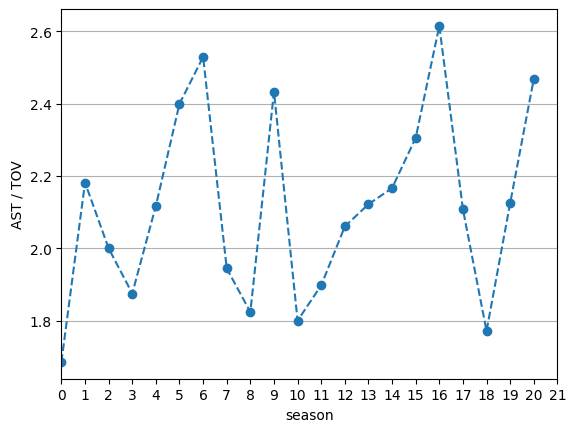

In [629]:
plt.figure()
plt.plot(range(21), lebron['AST'] / lebron['TOV'], 'o--')
# plt.plot(range(21), X['TOV'], 'r-')
plt.xlim(1, 21)
# plt.ylim(18, 35)
plt.grid(axis='y')
plt.xlabel('season')
plt.ylabel('AST / TOV')

# # Find max and min points
# max_point = max(y)
# min_point = min(y)
# max_index = y.idxmax() + 1  # Use idxmax() to get the index of the maximum value
# min_index = y.idxmin() + 1  # Use idxmin() to get the index of the minimum value

# Annotate max and min points
#     plt.annotate(f'Max: {max_point} in season {max_index}', xy=(max_index, max_point), xytext=(max_index, max_point + 2),
#                  arrowprops=dict(facecolor='green', arrowstyle='->'), color='green')
#     plt.annotate(f'Min: {min_point} in season {min_index}', xy=(min_index, min_point), xytext=(min_index, min_point - 2),
#                  arrowprops=dict(facecolor='red', arrowstyle='->'), color='red')

plt.xticks(range(0, 22, 1))

In [630]:
steph = pd.read_csv('steph.csv')
harden = pd.read_csv('harden.csv')
cp3 = pd.read_csv('cp3.csv')

Text(0, 0.5, 'AST / TOV')

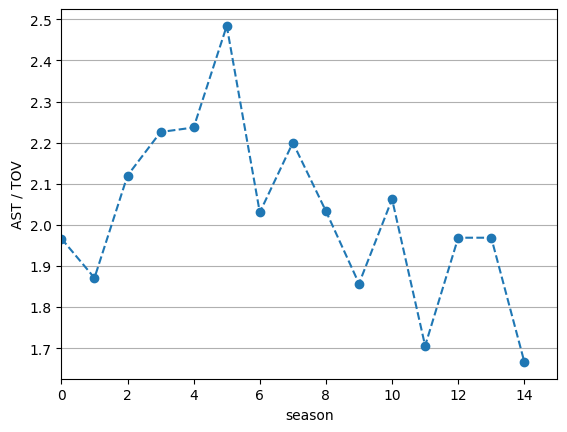

In [631]:
plt.figure()
plt.plot(range(len(steph)), steph['AST'] / steph['TOV'], 'o--')
# plt.plot(range(21), X['TOV'], 'r-')
plt.xlim(0, len(steph))
# plt.ylim(18, 35)
plt.grid(axis='y')
plt.xlabel('season')
plt.ylabel('AST / TOV')

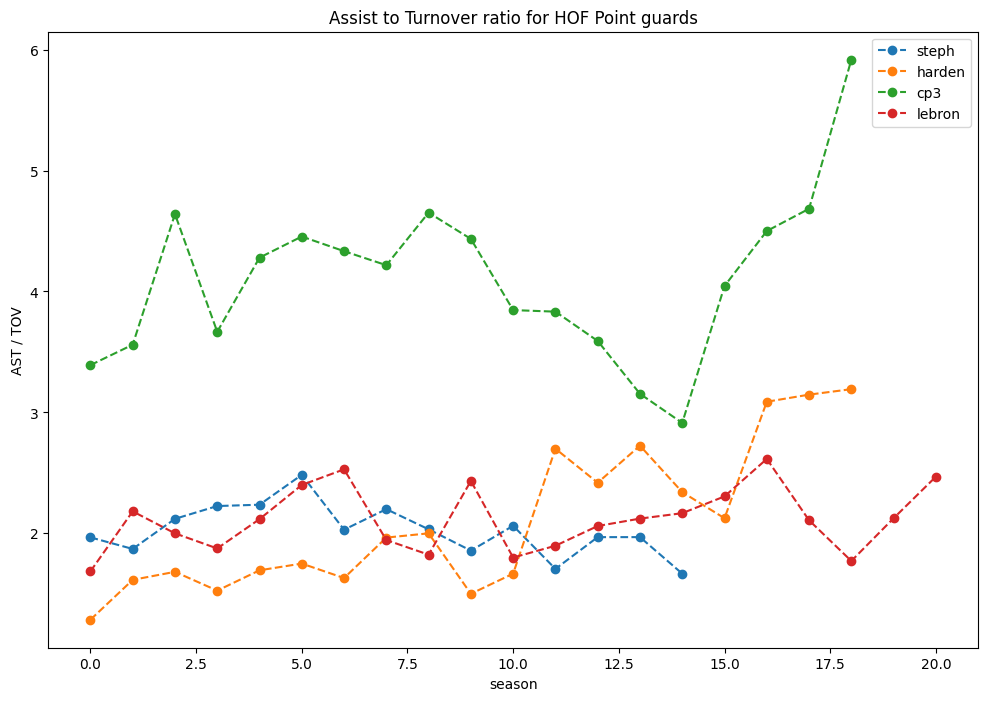

In [632]:
def plot_ast_tov(player, name):
#     plt.figure()
    plt.plot(range(len(player)), player['AST'] / player['TOV'], 'o--', label=name)
    # plt.plot(range(21), X['TOV'], 'r-')
#     plt.xlim(0, len(player))
    # plt.ylim(18, 35)
    plt.grid()
    plt.xlabel('season')
    plt.ylabel('AST / TOV')
    plt.title('Assist to Turnover ratio for HOF Point guards')
    plt.legend()
    
#     plt.xticks(1, 20)
plt.figure(figsize=(12, 8))   
plot_ast_tov(steph, 'steph')
plot_ast_tov(harden, 'harden')
plot_ast_tov(cp3, 'cp3')
plot_ast_tov(lebron, 'lebron')
# plt.xticks(1, 20)

In [633]:
def plot_stat(player, name, stat):
    plt.plot(range(len(player)), player[stat], 'o--', label=name)
    plt.grid(axis='y')
    plt.xlabel('season')
    plt.ylabel(stat)
    plt.title(f'{stat} for HOF Point guards')
    plt.legend()

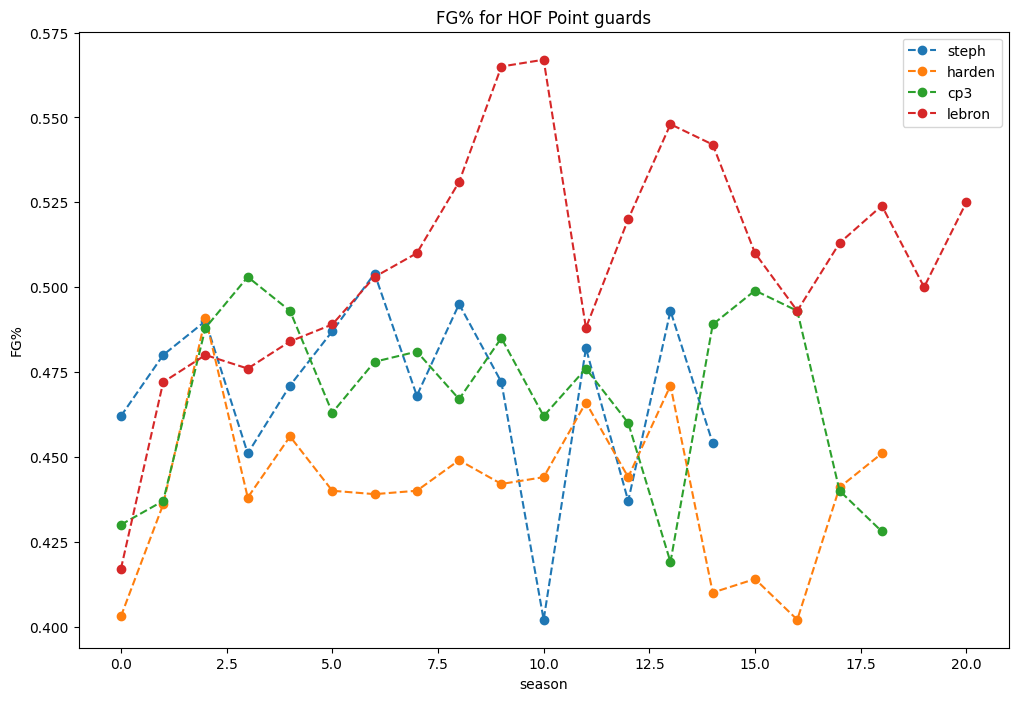

In [634]:
plt.figure(figsize=(12, 8))
stat = 'FG%'
plot_stat(steph, 'steph', stat)
plot_stat(harden, 'harden', stat)
plot_stat(cp3, 'cp3', stat)
plot_stat(lebron, 'lebron', stat)

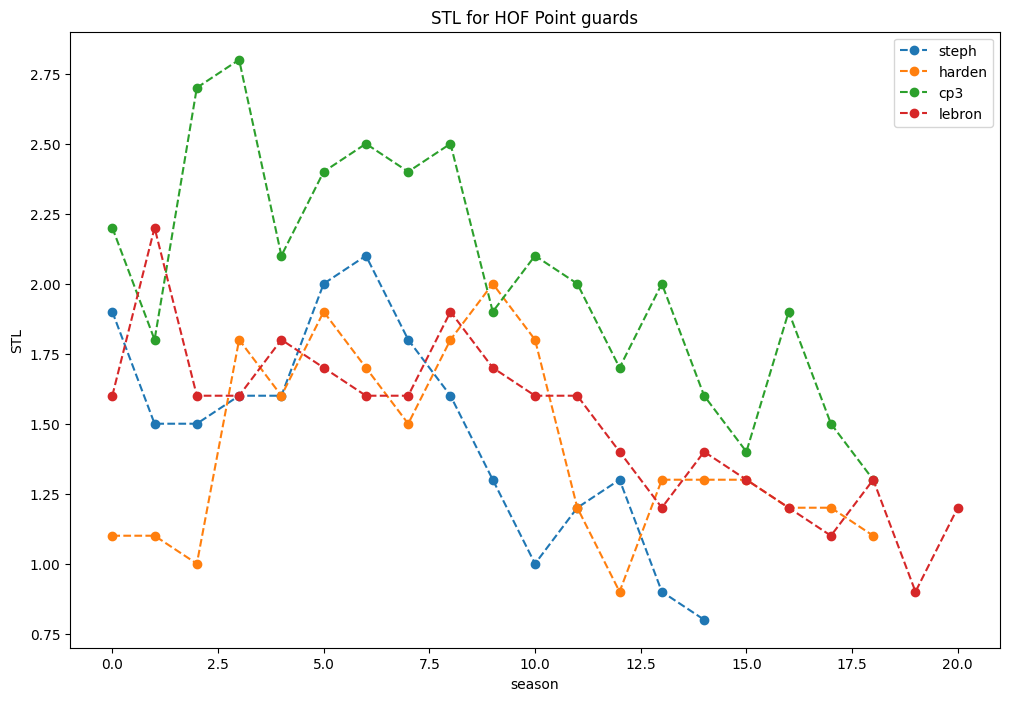

In [635]:
plt.figure(figsize=(12, 8))
stat = 'STL'
plot_stat(steph, 'steph', stat)
plot_stat(harden, 'harden', stat)
plot_stat(cp3, 'cp3', stat)
plot_stat(lebron, 'lebron', stat)

In [636]:
lebron.columns

Index(['Season', 'Age', 'Lg', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [637]:
del lebron['Lg']

In [638]:
lebron

,Season,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,19,79,79,39.5,7.9,18.9,0.417,0.8,2.7,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,2004-05,20,80,80,42.4,9.9,21.1,0.472,1.4,3.9,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,2005-06,21,79,79,42.5,11.1,23.1,0.480,1.6,4.8,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,2006-07,22,78,78,40.9,9.9,20.8,0.476,1.3,4.0,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,2007-08,23,75,74,40.4,10.6,21.9,0.484,1.5,4.8,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0
5,2008-09,24,81,81,37.7,9.7,19.9,0.489,1.6,4.7,...,0.780,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4
6,2009-10,25,76,76,39.0,10.1,20.1,0.503,1.7,5.1,...,0.767,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7
7,2010-11,26,79,79,38.8,9.6,18.8,0.510,1.2,3.5,...,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7
8,2011-12,27,62,62,37.5,10.0,18.9,0.531,0.9,2.4,...,0.771,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1
9,2012-13,28,76,76,37.9,10.1,17.8,0.565,1.4,3.3,...,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8


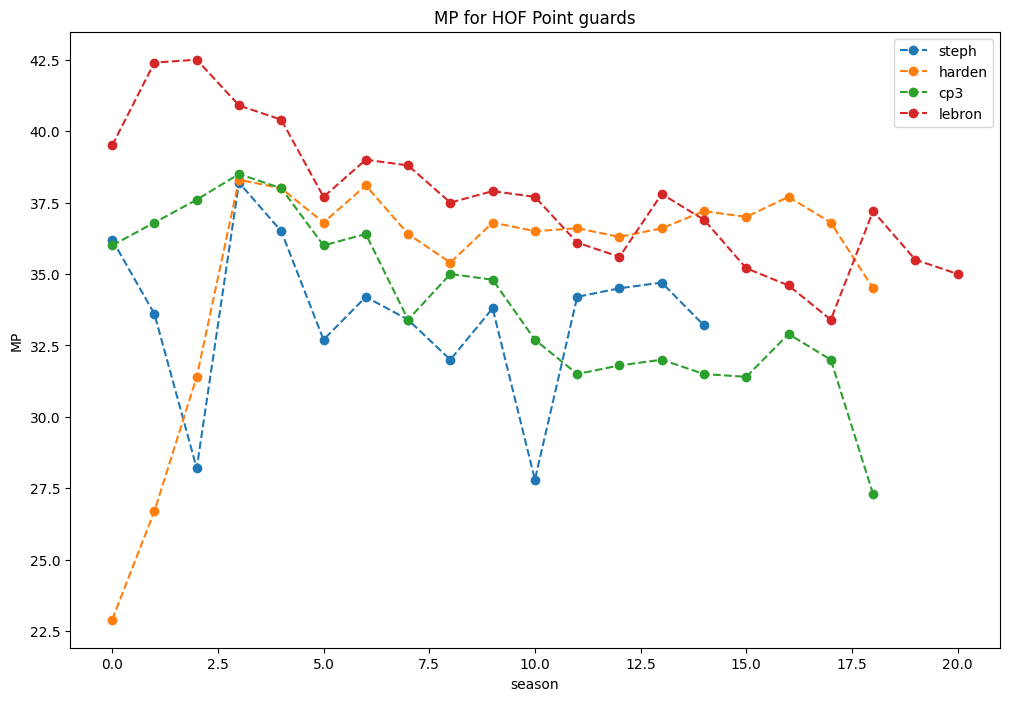

In [639]:
plt.figure(figsize=(12, 8))
stat = 'MP'
plot_stat(steph, 'steph', stat)
plot_stat(harden, 'harden', stat)
plot_stat(cp3, 'cp3', stat)
plot_stat(lebron, 'lebron', stat)

In [640]:
# steph = steph.dropna()
# harden.dropna()
# cp3.dropna()
cp3

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,2005-06,20,NOK,NBA,PG,78,78,36.0,5.2,12.1,...,0.8,4.3,5.1,7.8,2.2,0.1,2.3,2.8,16.1,ROY-1
1,2006-07,21,NOK,NBA,PG,64,64,36.8,6.0,13.6,...,0.8,3.5,4.4,8.9,1.8,0.0,2.5,2.4,17.3,NaN
2,2007-08,22,NOH,NBA,PG,80,80,37.6,7.9,16.1,...,0.8,3.2,4.0,11.6,2.7,0.1,2.5,2.3,21.1,MVP-2NBA1DEF2ASDPOY-7MIP-8
3,2008-09,23,NOH,NBA,PG,78,78,38.5,8.1,16.1,...,0.9,4.7,5.5,11.0,2.8,0.1,3.0,2.7,22.8,MVP-5DEF1NBA2ASDPOY-6
4,2009-10,24,NOH,NBA,PG,45,45,38.0,7.0,14.2,...,0.4,3.8,4.2,10.7,2.1,0.2,2.5,2.6,18.7,AS
5,2010-11,25,NOH,NBA,PG,80,80,36.0,5.4,11.6,...,0.5,3.6,4.1,9.8,2.4,0.1,2.2,2.5,15.9,MVP-13DEF2NBA3ASDPOY-12
6,2011-12,26,LAC,NBA,PG,60,60,36.4,7.1,14.8,...,0.7,2.9,3.6,9.1,2.5,0.1,2.1,2.3,19.8,MVP-3NBA1DEF1ASDPOY-12
7,2012-13,27,LAC,NBA,PG,70,70,33.4,5.9,12.2,...,0.8,3.0,3.7,9.7,2.4,0.1,2.3,2.0,16.9,MVP-4NBA1DEF1ASDPOY-11
8,2013-14,28,LAC,NBA,PG,62,62,35.0,6.5,14.0,...,0.6,3.7,4.3,10.7,2.5,0.1,2.3,2.5,19.1,MVP-7NBA1DEF1ASDPOY-13
9,2014-15,29,LAC,NBA,PG,82,82,34.8,6.9,14.3,...,0.6,4.0,4.6,10.2,1.9,0.2,2.3,2.5,19.1,MVP-6DEF1NBA2ASDPOY-15


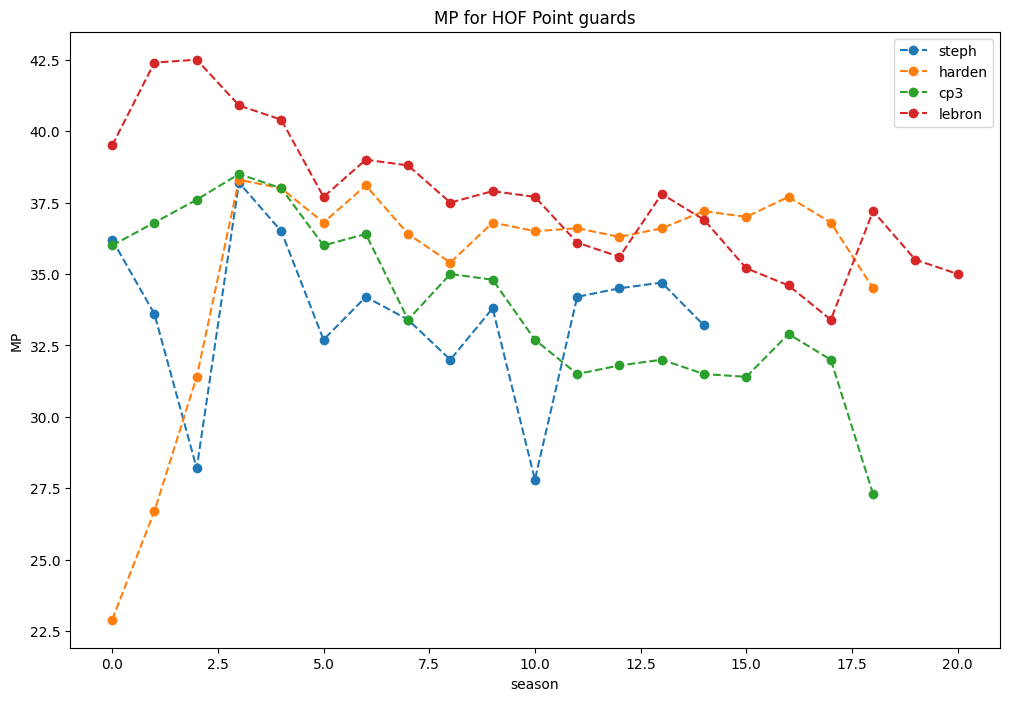

In [641]:
plt.figure(figsize=(12, 8))
stat = 'MP'
plot_stat(steph, 'steph', stat)
plot_stat(harden, 'harden', stat)
plot_stat(cp3, 'cp3', stat)
plot_stat(lebron, 'lebron', stat)

In [642]:
harden = harden[harden['Tm'] !='TOT']
# lebron = lebron[lebron['Tm'] !='TOT']
cp3 = cp3[cp3['Tm'] !='TOT']
steph = steph[steph['Tm'] !='TOT']

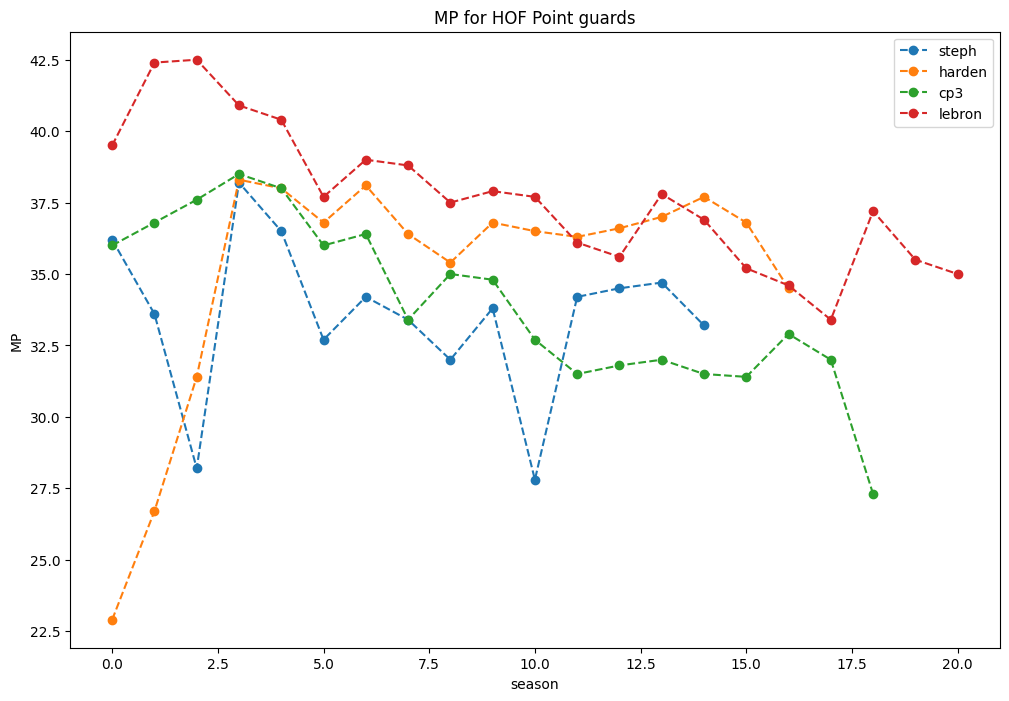

In [643]:
plt.figure(figsize=(12, 8))
stat = 'MP'
plot_stat(steph, 'steph', stat)
plot_stat(harden, 'harden', stat)
plot_stat(cp3, 'cp3', stat)
plot_stat(lebron, 'lebron', stat)

In [644]:
for player in [lebron, steph, harden, cp3]:
    player['AST / TOV'] = player['AST'] / player['TOV']

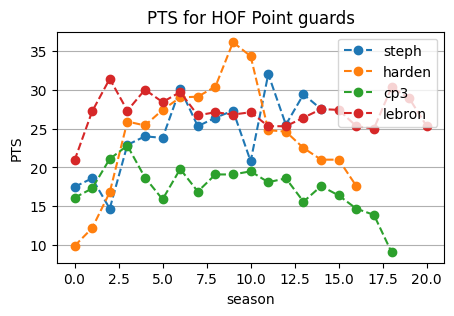

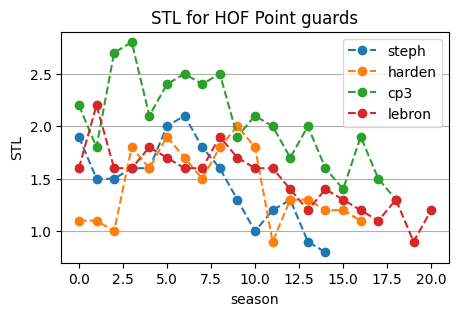

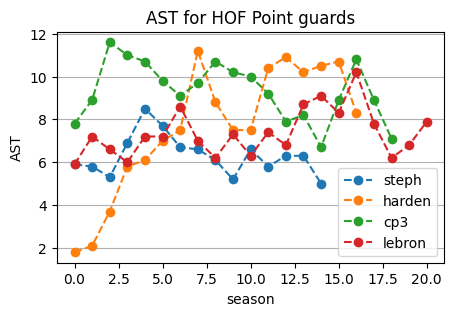

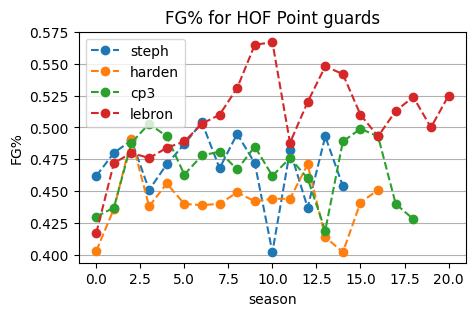

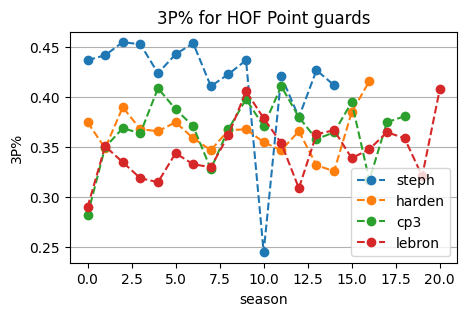

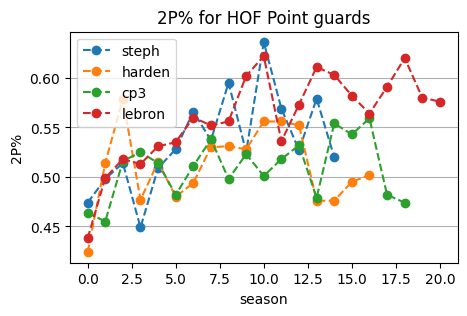

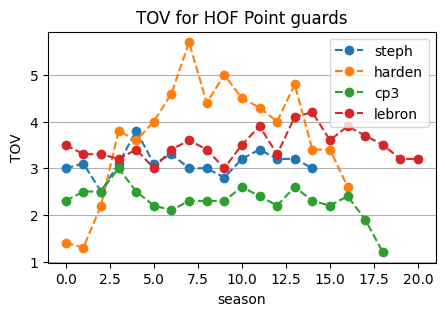

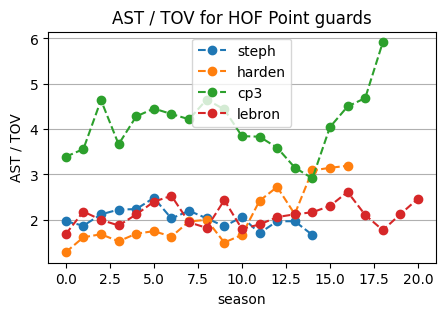

In [645]:
features = ['PTS', 'STL', 'AST', 'FG%', '3P%', '2P%', 'TOV', 'AST / TOV']
for stat in features:
    plt.figure(figsize=(5, 3))
    plt.grid(axis='y')
    plot_stat(steph, 'steph', stat)
    plot_stat(harden, 'harden', stat)
    plot_stat(cp3, 'cp3', stat)
    plot_stat(lebron, 'lebron', stat)

In [646]:
dame = pd.read_csv('dame.csv')
dame = dame[dame['Tm'] !='TOT']
for player in [lebron, steph, harden, cp3, dame]:
    player['AST / TOV'] = player['AST'] / player['TOV']

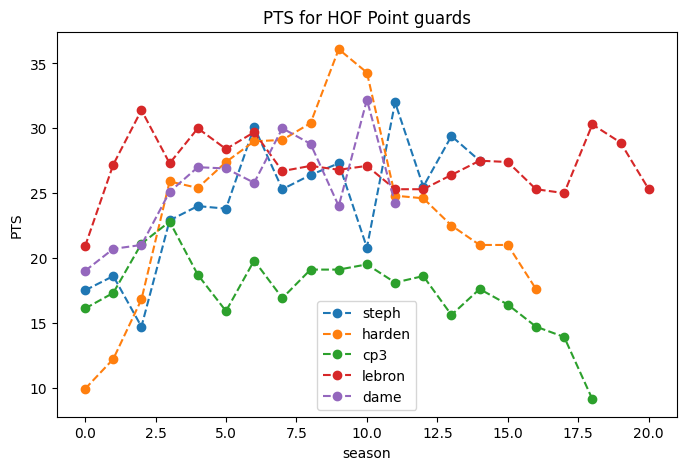

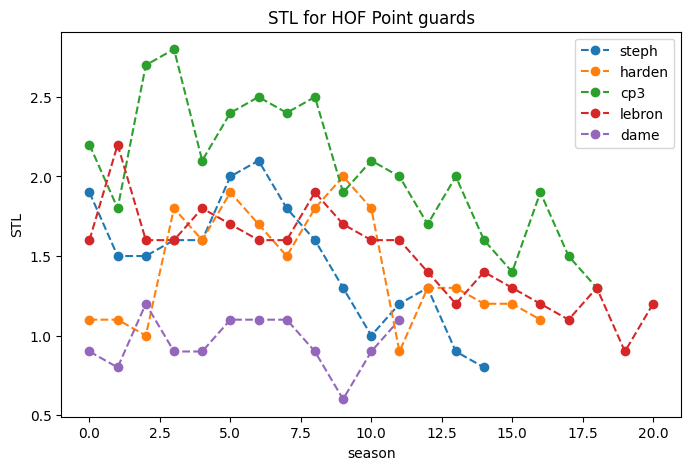

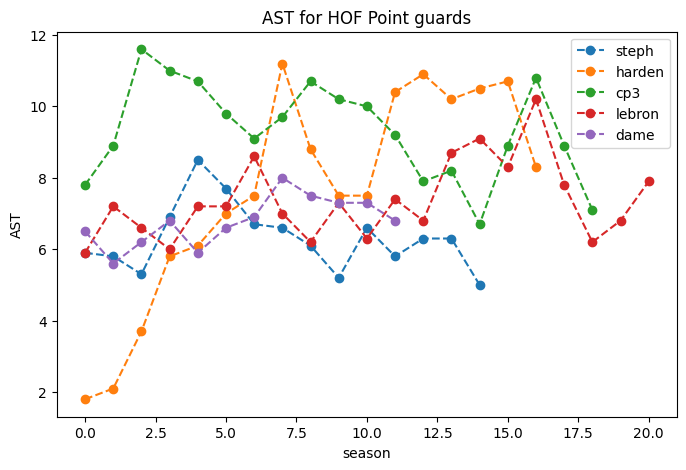

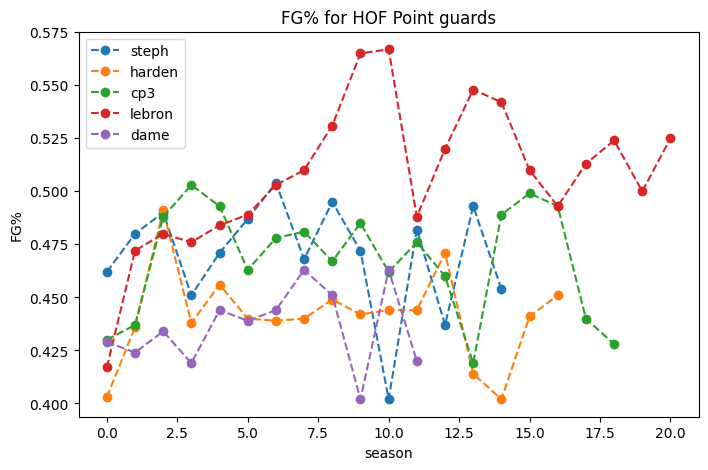

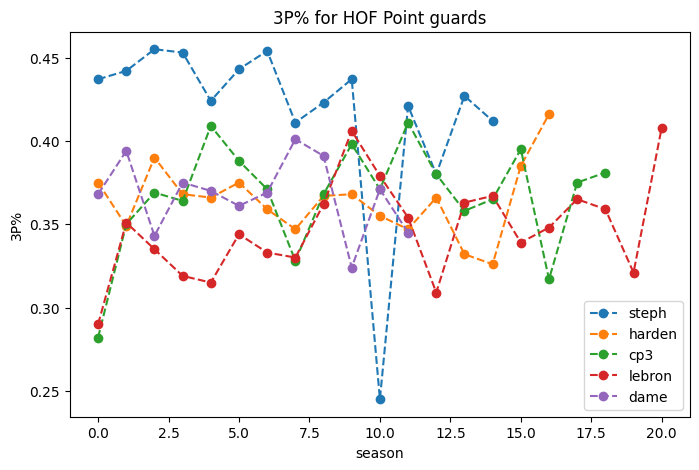

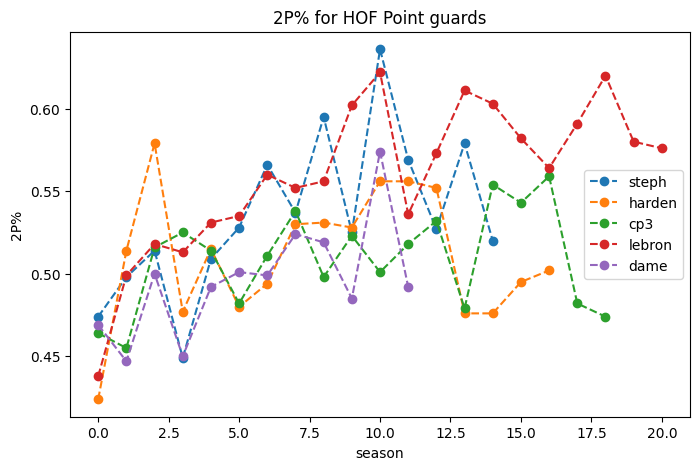

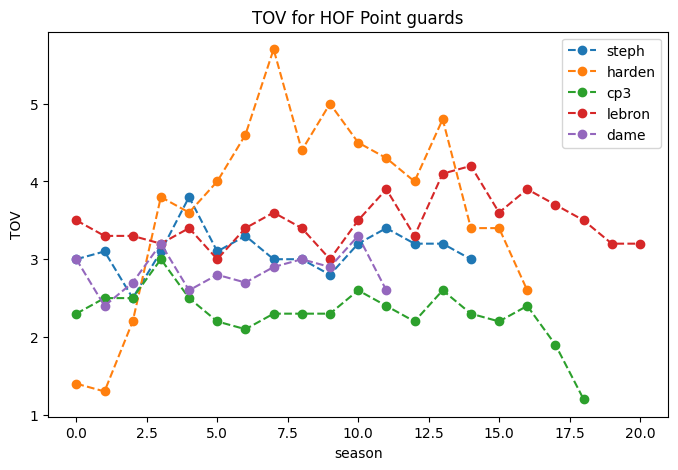

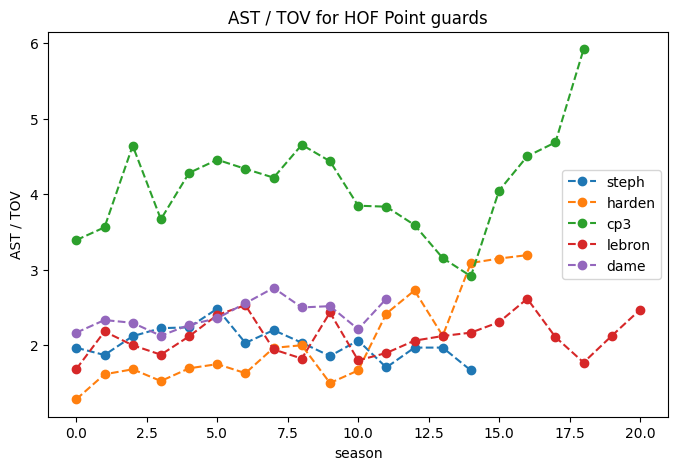

In [647]:
features = ['PTS', 'STL', 'AST', 'FG%', '3P%', '2P%', 'TOV', 'AST / TOV']
for stat in features:
    plt.figure(figsize=(8, 5))
    plt.grid(axis='y')
    plot_stat(steph, 'steph', stat)
    plot_stat(harden, 'harden', stat)
    plot_stat(cp3, 'cp3', stat)
    plot_stat(lebron, 'lebron', stat)
    plot_stat(dame, 'dame', stat)

In [648]:
final = pd.DataFrame()

In [649]:
final['Players'] = ['Steph', 'Lebron', 'Harden', 'CP3', 'Dame']

In [650]:
final

,Players
0,Steph
1,Lebron
2,Harden
3,CP3
4,Dame


In [651]:
# for player in [steph, lebron, harden, cp3, dame]:
steph.mean()

/var/folders/rj/xbh3qs3113570m39p4g31bth0000gp/T/ipykernel_49556/1519880766.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  steph.mean()


Age          28.000000
G            62.533333
GS           62.133333
MP           33.546667
FG            8.286667
FGA          17.620000
FG%           0.469867
3P            3.813333
3PA           9.220000
3P%           0.417600
2P            4.460000
2PA           8.400000
2P%           0.535067
eFG%          0.575933
FT            4.000000
FTA           4.373333
FT%           0.909733
ORB           0.673333
DRB           4.086667
TRB           4.740000
AST           6.313333
STL           1.473333
BLK           0.273333
TOV           3.113333
PF            2.306667
PTS          24.386667
AST / TOV     2.026499
dtype: float64

In [652]:
final['steph'] = steph.mean()

/var/folders/rj/xbh3qs3113570m39p4g31bth0000gp/T/ipykernel_49556/321976640.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  final['steph'] = steph.mean()


In [653]:
final

,Players,steph
0,Steph,NaN
1,Lebron,NaN
2,Harden,NaN
3,CP3,NaN
4,Dame,NaN


In [654]:
features = ['PTS', 'STL', 'AST', 'FG%', '3P%', '2P%', 'TOV', 'AST / TOV']

In [655]:
steph = steph[features]
dame = dame[features]
lebron = lebron[features]
harden = harden[features]
cp3 = cp3[features]

In [656]:
del final['steph']

In [657]:
final

,Players
0,Steph
1,Lebron
2,Harden
3,CP3
4,Dame


In [658]:
steph_avgs = steph.mean().to_frame()

In [659]:
for i in features:
    final[i] = None

In [660]:
final

,Players,PTS,STL,AST,FG%,3P%,2P%,TOV,AST / TOV
0,Steph,None,None,None,None,None,None,None,None
1,Lebron,None,None,None,None,None,None,None,None
2,Harden,None,None,None,None,None,None,None,None
3,CP3,None,None,None,None,None,None,None,None
4,Dame,None,None,None,None,None,None,None,None


In [661]:
steph_avg = steph.mean()
lebron_avg = lebron.mean()
harden_avg = harden.mean()
cp3_avg = cp3.mean()
dame_avg = dame.mean()

# Assign career averages to final
final.loc[0] = ['Steph'] + list(steph_avg)
final.loc[1] = ['Lebron'] + list(lebron_avg)
final.loc[2] = ['Harden'] + list(harden_avg)
final.loc[3] = ['CP3'] + list(cp3_avg)
final.loc[4] = ['Dame'] + list(dame_avg)

# Display the updated final DataFrame
final

,Players,PTS,STL,AST,FG%,3P%,2P%,TOV,AST / TOV
0,Steph,24.386667,1.473333,6.313333,0.469867,0.4176,0.535067,3.113333,2.026499
1,Lebron,27.109524,1.5,7.366667,0.507476,0.347476,0.560095,3.485714,2.115799
2,Harden,24.0,1.429412,7.647059,0.441235,0.364176,0.510882,3.705882,2.059523
3,CP3,17.384211,2.042105,9.326316,0.467947,0.367368,0.508842,2.305263,4.111253
4,Dame,25.391667,0.958333,6.783333,0.436,0.367667,0.496,2.841667,2.392216


In [662]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = features # Select all columns

print(columns_to_standardize)

# Create a StandardScaler object
scaler = StandardScaler()

# # Fit the scaler to the data and transform the columns
final[columns_to_standardize] = scaler.fit_transform(final[columns_to_standardize])

final

new_player = pd.DataFrame()
for i in features:
    new_player[i] = 0.00000

new_player.loc[0] = list(nash_avg)
print(new_player)
new_player[columns_to_standardize] = scaler.transform(new_player[columns_to_standardize])
print(new_player)


print(new_player.columns)
print(final.columns)

['PTS', 'STL', 'AST', 'FG%', '3P%', '2P%', 'TOV', 'AST / TOV']
         PTS       STL       AST       FG%       3P%       2P%       TOV  \
0  13.516667  0.722222  8.161111  0.477278  0.416944  0.502833  2.772222   

   AST / TOV  
0   2.879428  
        PTS       STL       AST      FG%       3P%       2P%       TOV  \
0 -3.058679 -2.205775  0.654681  0.50167  1.870193 -0.849177 -0.645685   

   AST / TOV  
0   0.425283  
Index(['PTS', 'STL', 'AST', 'FG%', '3P%', '2P%', 'TOV', 'AST / TOV'], dtype='object')
Index(['Players', 'PTS', 'STL', 'AST', 'FG%', '3P%', '2P%', 'TOV',
       'AST / TOV'],
      dtype='object')


In [663]:
import pickle

# Assuming scaler is your StandardScaler object fitted to the training data
with open('scaler_params.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [664]:
knn = KNeighborsClassifier(n_neighbors=2)

In [665]:
X = final[features]

In [666]:
y = final['Players']

In [667]:
X

,PTS,STL,AST,FG%,3P%,2P%,TOV,AST / TOV
0,0.220929,-0.021241,-1.140747,0.210585,1.898002,0.565830,0.046600,-0.646730
1,1.042448,0.056316,-0.117256,1.687768,-1.076693,1.664555,0.802347,-0.534491
2,0.104268,-0.148983,0.155192,-0.913964,-0.368257,-0.495834,1.249178,-0.605222
3,-1.891795,1.632976,1.786874,0.135201,-0.232852,-0.585399,-1.593378,1.973517
4,0.524150,-1.519069,-0.684063,-1.119590,-0.220200,-1.149152,-0.504747,-0.187074


In [668]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [669]:
new_player = np.array([24.386667, 1.473333, 6.313333, 0.469867, 0.4176, 0.535067, 3.113333, 2.026499])

In [670]:
nash = pd.read_csv('nash.csv')
nash['AST / TOV'] = nash['AST'] / nash['TOV']

In [671]:
nash = nash[features]

In [672]:
nash

,PTS,STL,AST,FG%,3P%,2P%,TOV,AST / TOV
0,3.3,0.3,2.1,0.423,0.418,0.425,1.0,2.100000
1,9.1,0.8,3.4,0.459,0.415,0.481,1.3,2.615385
2,7.9,0.9,5.5,0.363,0.374,0.355,2.1,2.619048
3,8.6,0.7,4.9,0.477,0.403,0.528,1.8,2.722222
4,15.6,1.0,7.3,0.487,0.406,0.518,2.9,2.517241
5,17.9,0.6,7.7,0.483,0.455,0.495,2.8,2.750000
6,17.7,1.0,7.3,0.465,0.413,0.482,2.3,3.173913
7,14.5,0.9,8.8,0.470,0.405,0.498,2.7,3.259259
8,15.5,1.0,11.5,0.502,0.431,0.526,3.3,3.484848
9,18.8,0.8,10.5,0.512,0.439,0.548,3.5,3.000000


In [673]:
new_player = pd.DataFrame()
for i in features:
    new_player[i] = 0.00000

In [674]:
nash_avg = nash.mean()


In [675]:
nash_avg

PTS          13.516667
STL           0.722222
AST           8.161111
FG%           0.477278
3P%           0.416944
2P%           0.502833
TOV           2.772222
AST / TOV     2.879428
dtype: float64

In [676]:
new_player

,PTS,STL,AST,FG%,3P%,2P%,TOV,AST / TOV


In [677]:
new_player.loc[0] = list(nash_avg)
new_player['PTS']

0    13.516667
Name: PTS, dtype: float64

In [678]:
# # scaler = StandardScaler()
# # columns_to_standardize = features
# # columns_to_standardize
# # new_player[columns_to_standardize] = scaler.fit_transform(new_player[columns_to_standardize])
# columns_to_standardize = new_player.columns  # Select all columns

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Fit the scaler to the data and transform the columns
# new_player[columns_to_standardize] = scaler.fit_transform(new_player[columns_to_standardize])


import pickle

# Load the scaler from the file
with open('scaler_params.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
# columns_to_standardize
# scaler
    
new_player[columns_to_standardize] = scaler.transform(new_player[columns_to_standardize])

In [683]:
new_player

,PTS,STL,AST,FG%,3P%,2P%,TOV,AST / TOV
0,-3.058679,-2.205775,0.654681,0.50167,1.870193,-0.849177,-0.645685,0.425283


In [680]:
knn.predict(new_player)
# new_player

array(['Dame'], dtype=object)

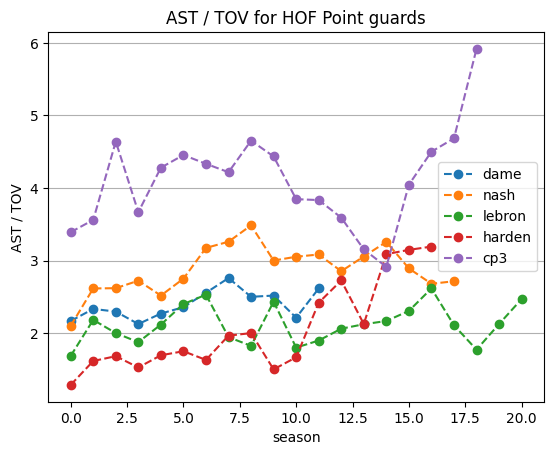

In [684]:
plot_stat(dame, 'dame', stat)
plot_stat(nash, 'nash', stat)
plot_stat(lebron, 'lebron', stat)
plot_stat(harden, 'harden', stat)
plot_stat(cp3, 'cp3', stat)